Kevin Hewitt, "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [46]:
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


# Model Cleaning

In [47]:
df = df.replace(r'\s+', np.nan, regex=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
CHILD       582 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
SPORT       4273 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.3+ MB


In [49]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [50]:
# Remove columns that have large amounts of missing data
df = df.drop(['CHILD', 'SPORT', 'COMP'], axis=1)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,65,194


In [51]:
# Replace null values wih the averages from the respective columns
df.GNDR.fillna(2, inplace=True)
df.OWNHOME.fillna(2, inplace=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,65,194


In [52]:
# Converting columns to integers for easier usability
df['AGE'] = pd.to_numeric(df['AGE'])
df['INCOME'] = pd.to_numeric(df['INCOME'])

In [53]:
df['INCOME'].mean()

2.882150715071507

In [54]:
df['AGE'].mean()

61.39291153260418

In [55]:
# replace null values with their averages
df.INCOME.fillna(3, inplace=True)
df.AGE.fillna(61, inplace=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,61.0,3.0,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,65,194


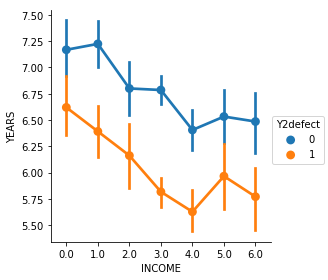

In [56]:
sns.factorplot("INCOME", "YEARS", "Y2defect", data=df)

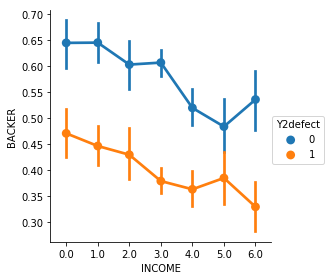

In [57]:
sns.factorplot("INCOME", "BACKER", "Y2defect", data=df)

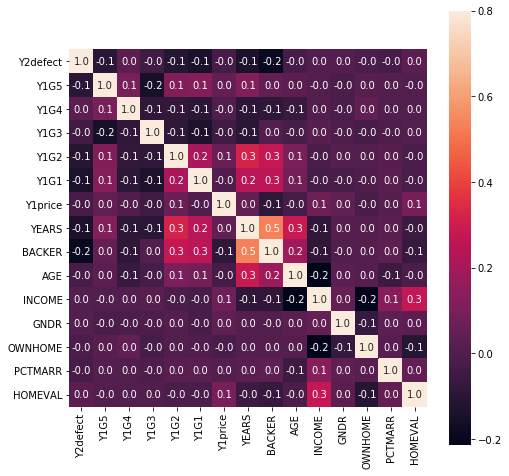

In [58]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

# Model Building

In [59]:
y = df['Y2defect']
X = df[['BACKER', 'YEARS', 'INCOME']]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.592766726944
[[922 441]
 [685 717]]
             precision    recall  f1-score   support

          0       0.57      0.68      0.62      1363
          1       0.62      0.51      0.56      1402

avg / total       0.60      0.59      0.59      2765

0.593930638863


# Model Deployment

In [63]:
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [64]:
df2 = df2.drop(['CHILD', 'SPORT', 'COMP'], axis=1)
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,0,1,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,0,0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,0,1,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,1,1,65,110


In [65]:
df2.GNDR.fillna(2, inplace=True)
df2.OWNHOME.fillna(2, inplace=True)
df2.INCOME.fillna(3, inplace=True)
df2.AGE.fillna(61, inplace=True)
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,0,1,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,61.0,,0,0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,0,1,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,1,1,65,110


In [66]:
# Change data types to integers
df2['AGE'] = pd.to_numeric(df['AGE'])
df2['INCOME'] = pd.to_numeric(df['INCOME'])
df2.head(2)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,94.0,4.0,0,1,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,61.0,3.0,0,,67,128


In [67]:
#rename Y2price in 
df2 = df2.rename(columns={'Y2price' : 'Y1price'})
df2.head(2)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,94.0,4.0,0,1,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,61.0,3.0,0,,67,128


In [68]:
# Fill in blank date with averages
df2.INCOME.fillna(3, inplace=True)
df2.AGE.fillna(61, inplace=True)
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,94.0,4.0,0,1,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,61.0,3.0,0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,67.0,2.0,0,0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,62.0,4.0,0,1,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,89.0,4.0,1,1,65,110


In [69]:
validation = df2[['BACKER', 'YEARS', 'INCOME']] #same variables as df1, same name too
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 3 columns):
BACKER    9542 non-null int64
YEARS     9542 non-null int64
INCOME    9542 non-null float64
dtypes: float64(1), int64(2)
memory usage: 223.7 KB


In [70]:
# create a new dataset of just the IDs to be used in the output file
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [71]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

# Story Telling

Based on my testing, the number of years previously subscribed, income, and if they were a member of theh backers club were all key indicators on the individuals decision to renew their season tickets or not. I feel that the the people who have subscriptions for longer periods tend to be big fans and are more likely to renew again. Income is a The customers who are members of the backers club already have interest in the team and were more likely to invest in season tickets and continue to support K-State sports. These are not 100% on  one way or the other, but these are reasons as to why those three columns seem to be good indicators of the likelyhood of customers renewing their season tickets.